<H1> Resultado das eleições municipais - Salinas(MG) 2024 </H1>

Apenas um detalhamento dos votos por seção e local de votação. 

<H2> Resultados da eleição de prefeito </H2>
<p> Obs: Os votos para Anderson Brito foram computados como nulos no resultado final. </p>

In [344]:
import pandas as pd
import numpy as np
from matplotlib import cm
from matplotlib import pyplot as plt

# LE DADOS
df = pd.read_csv("prefeito-final.csv", sep=";", encoding="ANSI", index_col=0).sort_values(by="SECAO")

# AJUSTA A VISIBILIDADE DA TABELA
pd.set_option('display.max_rows', len(df) + 1)

# AGRUPA POR LUGAR DE VOTAÇÃO, SEÇÃO E CANDIDATO
dg = df[["LOCAL", "CANDIDATO", "VOTOS"]].groupby(by=["LOCAL", "CANDIDATO"]).sum()

# TRANSFORMA OS CANDIDADOS EM COLUNAS
dg = dg.stack().unstack([-2,-1]).rename_axis((None, None), axis=1)

# REMOVE NIVEL DE INDICE DE COLUNAS
dg.columns = dg.columns.droplevel(-1)

dg["TOTAL"] = dg.sum(axis=1)

# APENAS INCLUI O TOTAL NA ÚLTIMA LINHA
dg.loc['total', : ] = dg.sum().values

# CORRIGE UMA CONVERSÃO INDESEJADA PARA VALORES DE PONTO FLUTUANTE
for c in dg.columns:
    dg[c] = dg[c].fillna(0).astype(int)


<h3> Resultados agrupados por local de votação </h3>

In [168]:
# MOSTRA TABELA
display(dg)

,ANDERSON BRITO,BENONI,KINCA DIAS,TOTAL
LOCAL,,,,
AMUSA,5,21,52,78
Associação Barreiros,4,8,41,53
Associação Boqueirão Baixo,4,2,40,46
Associação Boqueirão Medio,19,9,32,60
Associação Caiçara,0,31,26,57
Associação Corrego da Empoeira,7,21,48,76
Associação Pinhãozeiro,3,9,30,42
Associação Rural Rio das Antas,11,26,122,159
Associação Rural da Barra do Rio,2,5,105,112


<Axes: title={'center': 'Votação por local (mais de 300 eleitores)'}, xlabel='LOCAL'>

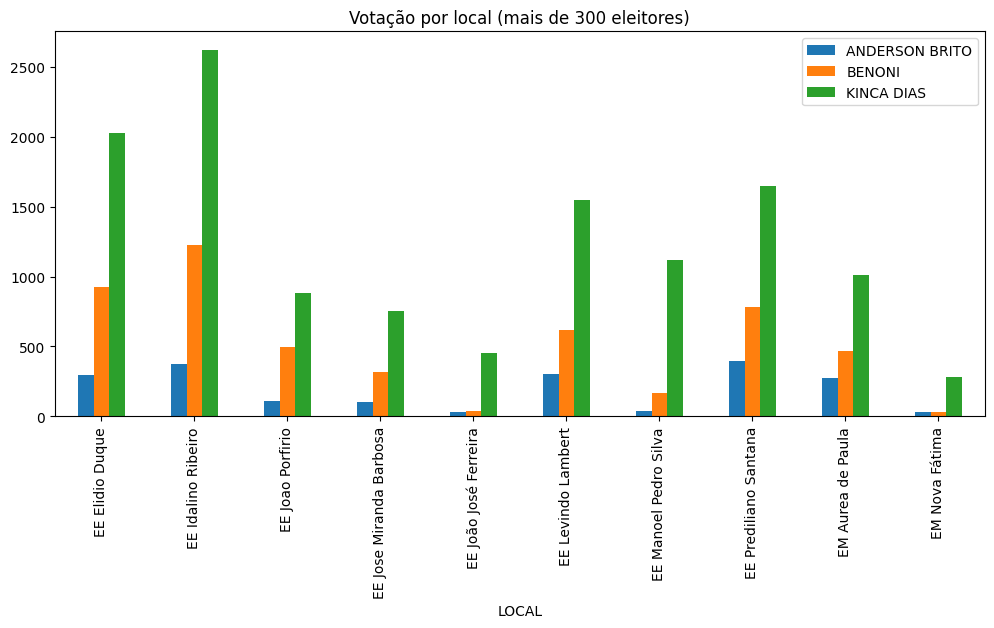

In [169]:
dg_locais_grandes = dg[dg["TOTAL"] >= 300].copy(deep=True)
dg_locais_grandes.drop(columns=dg.columns[-1],  axis=1,  inplace=True)
dg_locais_grandes[0:-1].plot(kind='bar', figsize=(12, 5), title="Votação por local (mais de 300 eleitores)")

<Axes: title={'center': 'Votação por local (menos de 300 eleitores)'}, xlabel='LOCAL'>

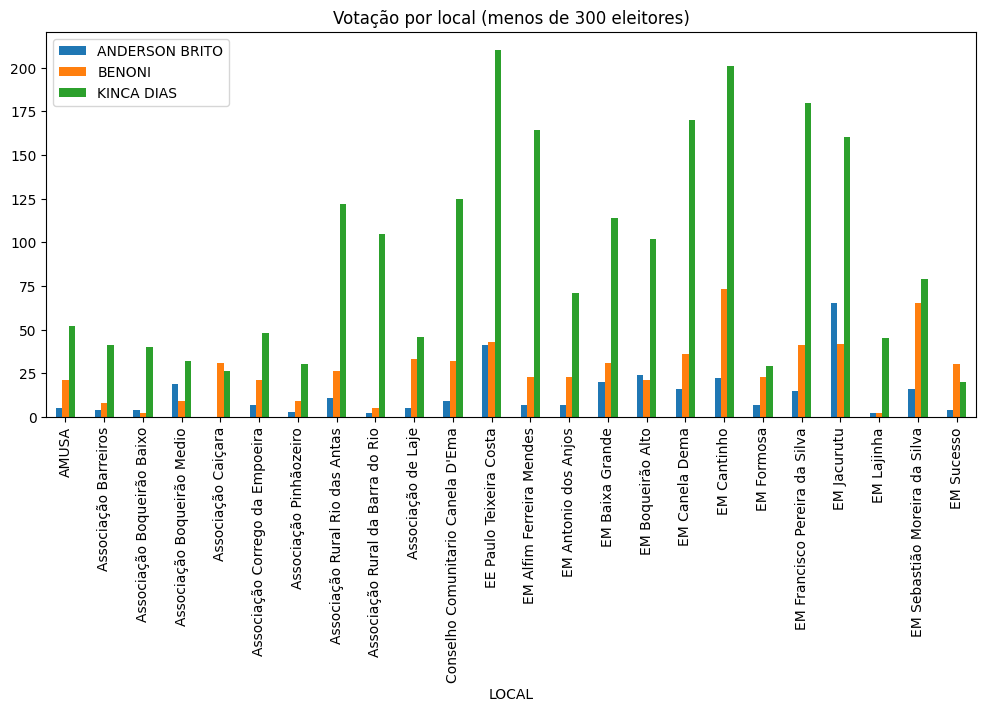

In [170]:
dg_locais_pequenos = dg[dg["TOTAL"] < 300].copy(deep=True)
dg_locais_pequenos.drop(columns=dg.columns[-1],  axis=1,  inplace=True)
dg_locais_pequenos[0:-1].plot(kind='bar', figsize=(12, 5), title="Votação por local (menos de 300 eleitores)")

In [180]:
# FUNCAO PARA DEFINIR AS CORES DA PRIMEIRA COLUNA
def color(x):
    no_repetitions = x.unique()
    return ["background-color: #f5f5f5; background: #f5f5f5" if np.where(no_repetitions == el)[0]%2 == 0 \
            else "background-color: #ffffff; background: #ffffff" for  index, el in x.items()]

In [181]:
# AGRUPA POR LUGAR DE VOTAÇÃO, SEÇÃO E CANDIDATO
dg = df.groupby(by=["LOCAL", "CANDIDATO", "SECAO"]).sum()

# CRIA UM AGRUPAMENTO SEM A SEÇÃO
dg1 = dg.groupby(["LOCAL", "CANDIDATO"]).sum()

# CRIA UM INDICE DO AGRUPAMENTO SUBSTITUINDO A SECAO POR TOTAL 
dg1.index = [dg1.index.get_level_values(0),
             dg1.index.get_level_values(1),
             ['Total'] * len(dg1)]

# INSERE AS LINHAS COM O INDICE "TOTAL" NA TABELA ORIGINAL E ORDENA POR LOCAL E CANDIDATO
dg = pd.concat([dg, dg1]).sort_index(level=[0,1])

# TRANSFORMA OS CANDIDADOS EM COLUNAS
dg = dg.stack().unstack([-3, -1]).rename_axis((None, None), axis=1)

# REMOVE NIVEL DE INDICE DE COLUNAS
dg.columns = dg.columns.droplevel(-1)

# APENAS INCLUI O TOTAL NA ÚLTIMA LINHA
dg.loc['total', : ] = dg.sum().values / 2

# RENOMEIA CABECALHO DA COLUNA DE INDICES
dg.index.names = ["LOCAL", "SECAO"]

# CORRIGE UMA CONVERSÃO INDESEJADA PARA VALORES DE PONTO FLUTUANTE
for c in dg.columns:
    dg[c] = dg[c].fillna(0).astype(int)

# CORRIGE AS CORES DA PRIMEIRA COLUNA
dg = dg.style.apply_index(color, axis=0, level =[0])


<H3> Resultados detalhados por seção </H3>

In [182]:
# MOSTRA TABELA
display(dg)


<H2> Resultados da eleição de vereador </H2>
<p> Obs: Os dados sobre coligação/federação/partidos são facilmente cosultáveis <a href="https://resultados.tse.jus.br/oficial/app/index.html#/divulga/votacao-de-partidos;e=619;cargo=13;uf=mg;mu=51390"> aqui </a>. Nessa tabela a intenção é apenas mostrar a votação em cada local. </p>
<p> Na coluna seção aparece todas as seções em que o candidato foi votado em um lugar (para locais com mais de uma seção eleitoral) </p>

<H3> Resultados agrupados por candidato </H3>

In [195]:
# LE DADOS
df = pd.read_csv("vereador-final.csv", sep=";", encoding="ANSI", index_col=0).sort_values(by="SECAO")

# AJUSTA A VISIBILIDADE DA TABELA
numero_candidatos = len(df["CANDIDATO"].unique())
pd.set_option('display.max_rows', len(df) + 1)
pd.set_option('display.max_columns', numero_candidatos + 1)

df["SECAO"] = df["SECAO"].apply(lambda x : str(x) + " ")

# AGRUPA POR LUGAR DE VOTAÇÃO, SEÇÃO E CANDIDATO
dfg = df.groupby(by=["CANDIDATO"]).apply(lambda x : x.groupby(by=["LOCAL"]).sum()\
                                         .sort_values(by="VOTOS", ascending=False), include_groups=False)

# APENAS INCLUI O TOTAL NA ÚLTIMA LINHA
dfg.loc['total', ["SECAO", "VOTOS"] ] = [" ", dfg["VOTOS"].sum()]

# CORRIGE UMA CONVERSÃO INDESEJADA PARA VALORES DE PONTO FLUTUANTE
dfg["VOTOS"] = dfg["VOTOS"].fillna(0).astype(int)


# CORRIGE AS CORES DA PRIMEIRA COLUNA
dfg = dfg.style.apply_index(color, axis=0, level =[0])

# MOSTRA TABELA
display(dfg)

<H3> Resultados agrupados por local </h3>

In [196]:
# AGRUPA POR LUGAR DE VOTAÇÃO, SEÇÃO E CANDIDATO
dfg = df.groupby(by=["LOCAL"]).apply(lambda x : x.groupby(by=["CANDIDATO"])\
                                     .sum().sort_values(by="VOTOS", ascending=False), include_groups=False)

# APENAS INCLUI O TOTAL NA ÚLTIMA LINHA
dfg.loc['total', ["SECAO", "VOTOS"] ] = [" ", dfg["VOTOS"].sum()]

# CORRIGE UMA CONVERSÃO INDESEJADA PARA VALORES DE PONTO FLUTUANTE
dfg["VOTOS"] = dfg["VOTOS"].fillna(0).astype(int)


# CORRIGE AS CORES DA PRIMEIRA COLUNA
dfg = dfg.style.apply_index(color, axis=0, level =[0])

# MOSTRA TABELA
display(dfg)

<H2> Resultados por partido </H2>

<p> Obs: Votos para a legenda (cerca de 1000 no total) não foram inclusos </p>

Text(0, 0.5, 'Total de votos')

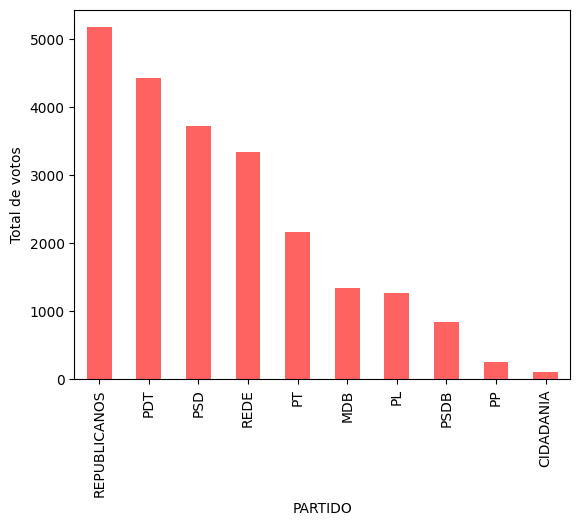

In [238]:
# LE OS PARTIDOS DE CADA VEREADOR E ACRESCENTA ESSA INFORMAÇÃO A TABELA INICIAL
df_vereador_partido = pd.read_csv("vereador-partido.csv", sep=";")
df_partidos = df.merge(df_vereador_partido, on="CANDIDATO")

df_partidos_group = df_partidos[["PARTIDO", "VOTOS"]].groupby(by="PARTIDO").sum().sort_values(by="VOTOS", ascending=False)
chart = df_partidos_group.plot(kind="bar", legend=False, color="#ff6361")
chart.set_ylabel("Total de votos")

<H3> Votação dos partidos por local de votação </H3>

In [239]:
# AGRUPA POR LUGAR DE VOTAÇÃO E PARTIDO
dfg = df_partidos[["LOCAL", "SECAO", "PARTIDO", "VOTOS"]].groupby(by=["PARTIDO"])\
.apply(lambda x : x.groupby(by=["LOCAL"]).aggregate({"SECAO": "unique","VOTOS": "sum"})\
       .sort_values(by="VOTOS", ascending=False), include_groups=False)

# TRANSFORMA LISTA EM TEXTO
dfg["SECAO"] = dfg["SECAO"].apply(lambda x : ' '.join(x))

# APENAS INCLUI O TOTAL NA ÚLTIMA LINHA
dfg.loc['total', ["SECAO", "VOTOS"] ] = [" ", dfg["VOTOS"].sum()]

# CORRIGE UMA CONVERSÃO INDESEJADA PARA VALORES DE PONTO FLUTUANTE
dfg["VOTOS"] = dfg["VOTOS"].fillna(0).astype(int)


# CORRIGE AS CORES DA PRIMEIRA COLUNA
dfg = dfg.style.apply_index(color, axis=0, level =[0])

# MOSTRA TABELA
display(dfg)

<h3> Votação de cada local dividida por partido </h3>

In [244]:
# AGRUPA POR LUGAR DE VOTAÇÃO E PARTIDO
dfg = df_partidos[["LOCAL", "SECAO", "PARTIDO", "VOTOS"]].groupby(by=["LOCAL"])\
.apply(lambda x : x.groupby(by=["PARTIDO"]).aggregate({"SECAO": "unique","VOTOS": "sum"})\
       .sort_values(by="VOTOS", ascending=False), include_groups=False)

# TRANSFORMA LISTA EM TEXTO
dfg["SECAO"] = dfg["SECAO"].apply(lambda x : ' '.join(x))

# APENAS INCLUI O TOTAL NA ÚLTIMA LINHA
dfg.loc['total', ["SECAO", "VOTOS"] ] = [" ", dfg["VOTOS"].sum()]

# CORRIGE UMA CONVERSÃO INDESEJADA PARA VALORES DE PONTO FLUTUANTE
dfg["VOTOS"] = dfg["VOTOS"].fillna(0).astype(int)

# CORRIGE AS CORES DA PRIMEIRA COLUNA
dfg = dfg.style.apply_index(color, axis=0, level =[0])

# MOSTRA TABELA
display(dfg)

<h3> Votação por candidato dentro de cada partido </h3>

In [243]:
# AGRUPA POR LUGAR DE VOTAÇÃO E PARTIDO
dfg = df_partidos[["PARTIDO", "CANDIDATO", "VOTOS"]].groupby(by=["PARTIDO"])\
.apply(lambda x : x.groupby(by=["CANDIDATO"]).sum()\
       .sort_values(by="VOTOS", ascending=False), include_groups=False)

# CORRIGE UMA CONVERSÃO INDESEJADA PARA VALORES DE PONTO FLUTUANTE
dfg["VOTOS"] = dfg["VOTOS"].fillna(0).astype(int)

# CORRIGE AS CORES DA PRIMEIRA COLUNA
dfg = dfg.style.apply_index(color, axis=0, level =[0])

# MOSTRA TABELA
display(dfg)

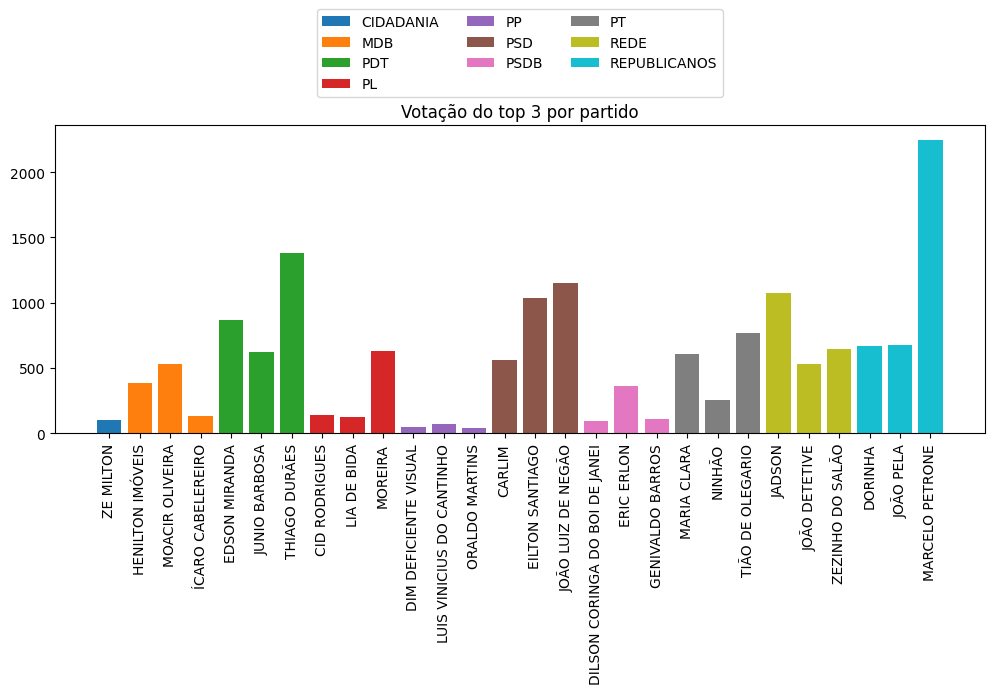

In [475]:
# CALCULA O TOP 3 MAIS VOTADOS DE CADA PARTIDO 
top3 = df_partidos[["PARTIDO", "CANDIDATO", "VOTOS"]].groupby(by=["PARTIDO"])\
.apply(lambda x : x.groupby(by="CANDIDATO").sum()\
       .sort_values(by="VOTOS", ascending=False).head(3), include_groups=False).sort_index(level=[0, 1])

# SELECIONA A LISTA DE PARTIDOS
partidos = top3.index.get_level_values(0).unique()

figure, ax = plt.subplots()
figure.set_size_inches(12, 4)
plt.xticks(rotation = 90)

linha_legenda = []
for partido in partidos:
    novo_df = top3.iloc[top3.index.get_loc(partido)].reset_index()

    # CRIA UMA COLUNA COM A TABELA
    novo_df["PARTIDO"] = partido
    
    linha = ax.bar(novo_df["CANDIDATO"], novo_df["VOTOS"], width=0.8, label=partido)
    linha_legenda.append(linha)

ax.legend(handles = linha_legenda, loc='upper center', ncols=3, bbox_to_anchor=(0.5, 1.4))
ax.set_title("Votação do top 3 por partido")
plt.show()
